## Import bibliotek i wczytanie danych

In [34]:
import geopandas
import pandas as pd
import matplotlib.pyplot as plt
import contextily as ctx

In [11]:
mapa = geopandas.read_file('data/wojewodztwa.shp', encoding='utf-8')

In [12]:
dane_bezrobocie = pd.read_excel('data/bezrobocie.xlsx', sheet_name='Tabl.1')

## Obróbka danych

In [13]:
dane_bezrobocie

,"Tablica 1 Liczba bezrobotnych zarejestrowanych oraz stopa bezrobocia według makroregionów, regionów i podregionów",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,Table 1. Registered unemployed persons and un...,NaN,NaN,NaN,NaN,NaN,NaN
1,Stan w końcu października 2025 r.,NaN,NaN,NaN,NaN,NaN,NaN
2,As at the end of October 2025,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
107,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,Uwaga dot. tablicy 1,NaN,NaN,NaN,NaN,NaN,NaN
109,Dane opracowano według statystycznego podziału...,NaN,NaN,NaN,NaN,NaN,NaN
110,Note to table 1,NaN,NaN,NaN,NaN,NaN,NaN


Zmiana nazw oraz rodzajów zmiennych

In [14]:
dane_bezrobocie = dane_bezrobocie.iloc[9:]
dane_bezrobocie = dane_bezrobocie.rename(columns={
    'Unnamed: 4' : 'Wojewodztwo',
    'Unnamed: 5' : 'Bezrobotni w tys.',
    'Unnamed: 6' : 'Stopa bezrobocia w %',
})
dane_bezrobocie = dane_bezrobocie[['Wojewodztwo', 'Bezrobotni w tys.', 'Stopa bezrobocia w %']]
dane_bezrobocie['Stopa bezrobocia w %'] = (
    dane_bezrobocie['Stopa bezrobocia w %']
    .astype(str).str.replace(',', '.')
    .pipe(pd.to_numeric, errors='coerce')
)

dane_bezrobocie['Bezrobotni w tys.'] = (
    dane_bezrobocie['Bezrobotni w tys.']
    .astype(str).str.replace(',', '.')
    .pipe(pd.to_numeric, errors='coerce')
)
dane_bezrobocie = dane_bezrobocie.reset_index(drop=True)
dane_bezrobocie

,Wojewodztwo,Bezrobotni w tys.,Stopa bezrobocia w %
0,POLSKA ...,867.3,5.6
1,MAKROREGION POŁUDNIOWY,142.4,4.5
2,REGION: Małopolskie,67.2,4.6
3,PODREGION: Miasto Kraków,13.0,2.5
4,PODREGION: Krakowski,11.6,4.2
...,...,...,...
98,NaN,NaN,NaN
99,NaN,NaN,NaN
100,NaN,NaN,NaN
101,NaN,NaN,NaN


Wyciągnięcie tylko województw z danych

In [15]:
dane_bezrobocie = dane_bezrobocie[
    dane_bezrobocie['Wojewodztwo'].str.strip().str.startswith('REGION: ', na=False)
].copy()
dane_bezrobocie

,Wojewodztwo,Bezrobotni w tys.,Stopa bezrobocia w %
2,REGION: Małopolskie,67.2,4.6
9,REGION: Śląskie,75.2,4.3
19,REGION: Wielkopolskie,54.8,3.5
26,REGION: Zachodniopomorskie,43.5,7.4
31,REGION: Lubuskie,19.6,5.5
35,REGION: Dolnośląskie,62.3,5.2
41,REGION: Opolskie,21.1,6.2
45,REGION: Kujawsko-pomorskie,58.1,7.7
51,REGION: Warmińsko-mazurskie,41.8,8.9
55,REGION: Pomorskie,48.9,5.3


Zsumowanie danych do jednego województwa

In [16]:
dane_bezrobocie['Wojewodztwo'] = dane_bezrobocie['Wojewodztwo'].replace({
    '.*Warszawski stołeczny.*': 'REGION: Mazowieckie',
    '.*Mazowiecki regionalny.*': 'REGION: Mazowieckie'
}, regex=True)

dane_bezrobocie = dane_bezrobocie.groupby('Wojewodztwo', as_index=False).sum()
dane_bezrobocie = dane_bezrobocie.reset_index(drop=True)

Usunieńcie przedrostka 'REGION: '

In [17]:
dane_bezrobocie['Wojewodztwo'] = dane_bezrobocie['Wojewodztwo'].str.replace('REGION: ', '')
dane_bezrobocie

,Wojewodztwo,Bezrobotni w tys.,Stopa bezrobocia w %
0,Dolnośląskie,62.3,5.2
1,Kujawsko-pomorskie,58.1,7.7
2,Lubelskie,59.4,7.9
3,Lubuskie,19.6,5.5
4,Małopolskie,67.2,4.6
5,Opolskie,21.1,6.2
6,Podkarpackie,69.7,9.0
7,Podlaskie,31.7,7.3
8,Pomorskie,48.9,5.3
9,Warmińsko-mazurskie,41.8,8.9


Wyczyszczenie nazw województw z znaków białych itp.

In [18]:
dane_bezrobocie['Wojewodztwo'] = dane_bezrobocie['Wojewodztwo'].str.lower()
dane_bezrobocie['Wojewodztwo'] = dane_bezrobocie['Wojewodztwo'].str.replace(r'region:\s*', '', regex=True)
dane_bezrobocie['Wojewodztwo'] = dane_bezrobocie['Wojewodztwo'].str.replace(u'\xa0', ' ')
dane_bezrobocie['Wojewodztwo'] = dane_bezrobocie['Wojewodztwo'].str.strip()
dane_bezrobocie['Wojewodztwo'] = dane_bezrobocie['Wojewodztwo'].str.title()
dane_bezrobocie['Wojewodztwo'].unique()

array(['Dolnośląskie', 'Kujawsko-Pomorskie', 'Lubelskie', 'Lubuskie',
       'Małopolskie', 'Opolskie', 'Podkarpackie', 'Podlaskie',
       'Pomorskie', 'Warmińsko-Mazurskie', 'Wielkopolskie',
       'Zachodniopomorskie', 'Łódzkie', 'Śląskie', 'Świętokrzyskie',
       'Mazowieckie'], dtype=object)

### Połączenie danych z mapą

In [19]:
mapa = mapa[['JPT_NAZWA_', 'JPT_KOD_JE', 'geometry']]
mapa = mapa.rename(columns={
    'JPT_NAZWA_': 'Wojewodztwo',
    'JPT_KOD_JE': 'Kod_TERYT'
})
mapa['Wojewodztwo'] = mapa['Wojewodztwo'].str.title()
mapa

,Wojewodztwo,Kod_TERYT,geometry
0,Zachodniopomorskie,32,"POLYGON ((188256.168 683730.875, 189761.898 68..."
1,Lubuskie,08,"POLYGON ((249058.528 411232.826, 249030.522 41..."
2,Dolnośląskie,02,"POLYGON ((351910.997 289041.305, 351818.002 28..."
3,Wielkopolskie,30,"POLYGON ((441690.785 515930.957, 441724.727 51..."
4,Pomorskie,22,"POLYGON ((488665.467 751328.589, 488780.891 75..."
5,Opolskie,16,"POLYGON ((410362.99 269639.399, 410366.16 2697..."
6,Kujawsko-Pomorskie,04,"POLYGON ((441690.785 515930.957, 441653.937 51..."
7,Śląskie,24,"MULTIPOLYGON (((559302.978 302887.587, 559268...."
8,Łódzkie,10,"POLYGON ((598629.334 417093.448, 598631.826 41..."
9,Małopolskie,12,"POLYGON ((631316.899 166704.316, 631331.032 16..."


In [20]:
mapa_bezrobocia = mapa.merge(dane_bezrobocie, on='Wojewodztwo', how='left')
mapa_bezrobocia

,Wojewodztwo,Kod_TERYT,geometry,Bezrobotni w tys.,Stopa bezrobocia w %
0,Zachodniopomorskie,32,"POLYGON ((188256.168 683730.875, 189761.898 68...",43.5,7.4
1,Lubuskie,08,"POLYGON ((249058.528 411232.826, 249030.522 41...",19.6,5.5
2,Dolnośląskie,02,"POLYGON ((351910.997 289041.305, 351818.002 28...",62.3,5.2
3,Wielkopolskie,30,"POLYGON ((441690.785 515930.957, 441724.727 51...",54.8,3.5
4,Pomorskie,22,"POLYGON ((488665.467 751328.589, 488780.891 75...",48.9,5.3
5,Opolskie,16,"POLYGON ((410362.99 269639.399, 410366.16 2697...",21.1,6.2
6,Kujawsko-Pomorskie,04,"POLYGON ((441690.785 515930.957, 441653.937 51...",58.1,7.7
7,Śląskie,24,"MULTIPOLYGON (((559302.978 302887.587, 559268....",75.2,4.3
8,Łódzkie,10,"POLYGON ((598629.334 417093.448, 598631.826 41...",60.9,6.2
9,Małopolskie,12,"POLYGON ((631316.899 166704.316, 631331.032 16...",67.2,4.6


## Tworzenie wykresu dla połączonych danych

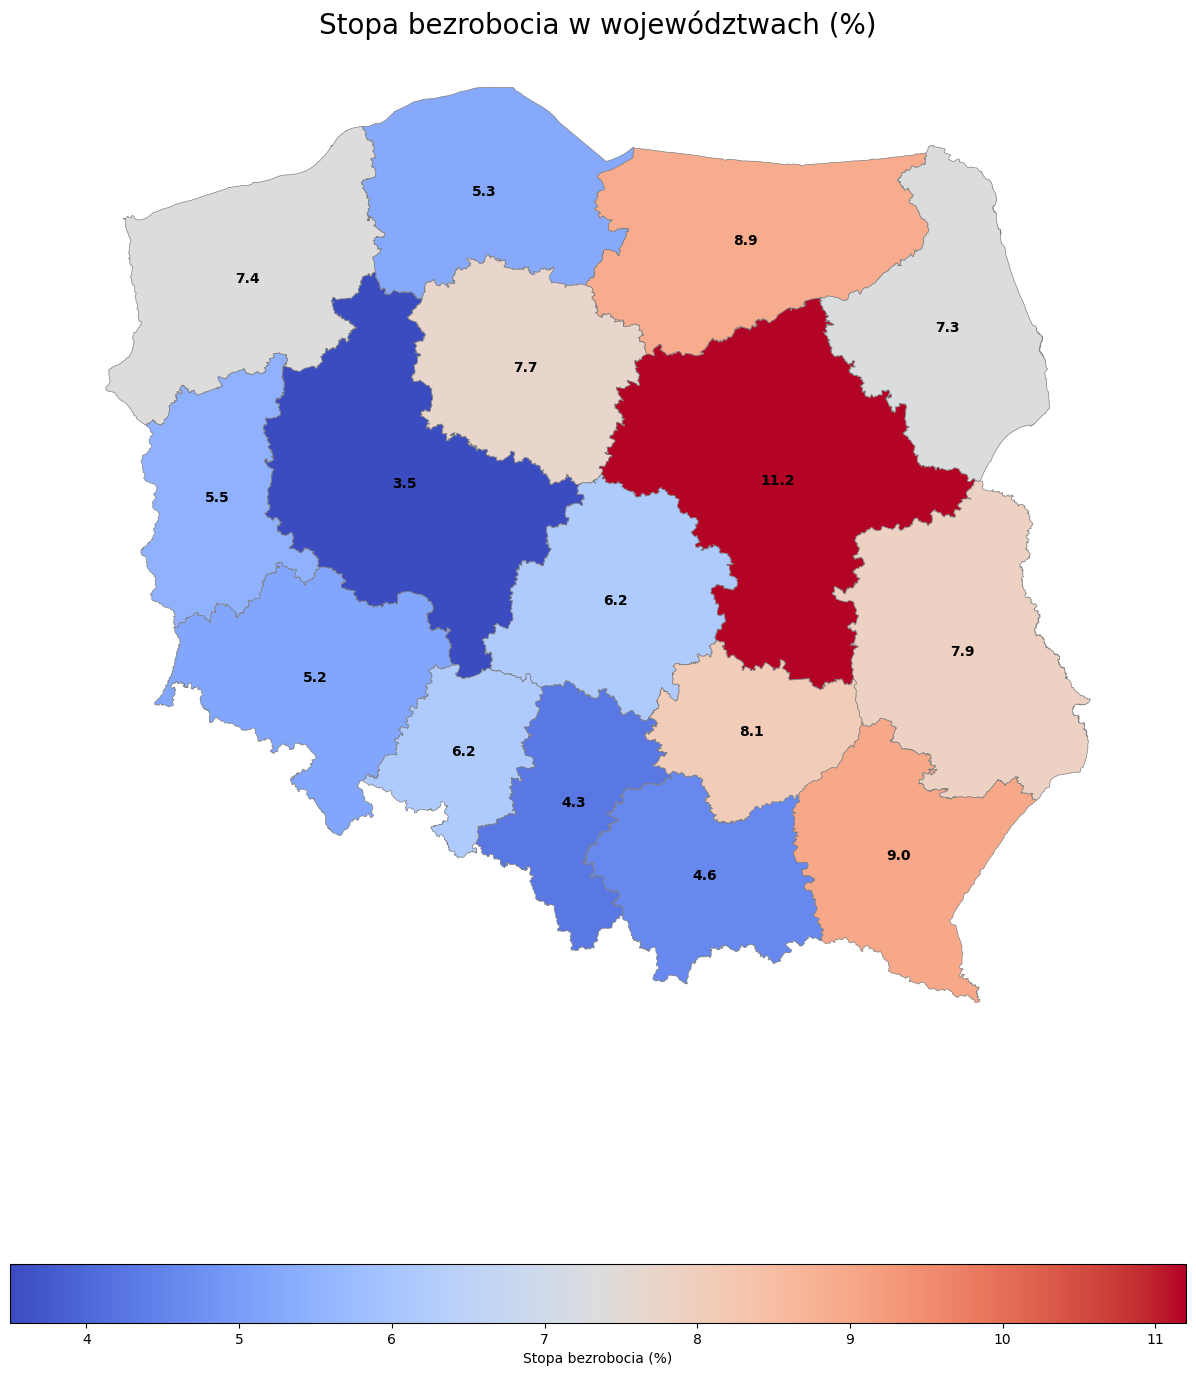

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))

mapa_bezrobocia.plot(
    column='Stopa bezrobocia w %',
    ax=ax,
    legend=True,
    legend_kwds={'label': "Stopa bezrobocia (%)", 'orientation': "horizontal", 'shrink': 0.8},
    cmap='coolwarm',
    edgecolor='gray',
    linewidth=0.5
)

for idx, row in mapa_bezrobocia.iterrows():
    wartosc = row['Stopa bezrobocia w %']

    if pd.notna(wartosc):
        x = row['geometry'].centroid.x
        y = row['geometry'].centroid.y

        ax.annotate(
            text=f"{wartosc:.1f}",
            xy=(x, y),
            ha='center',
            va='center',
            fontsize=10,
            color='black',
            weight='bold'
        )

ax.set_axis_off()
plt.title('Stopa bezrobocia w województwach (%)', fontsize=20)
plt.tight_layout()
plt.show()

Można również dodac prawdziwą mape jako tło

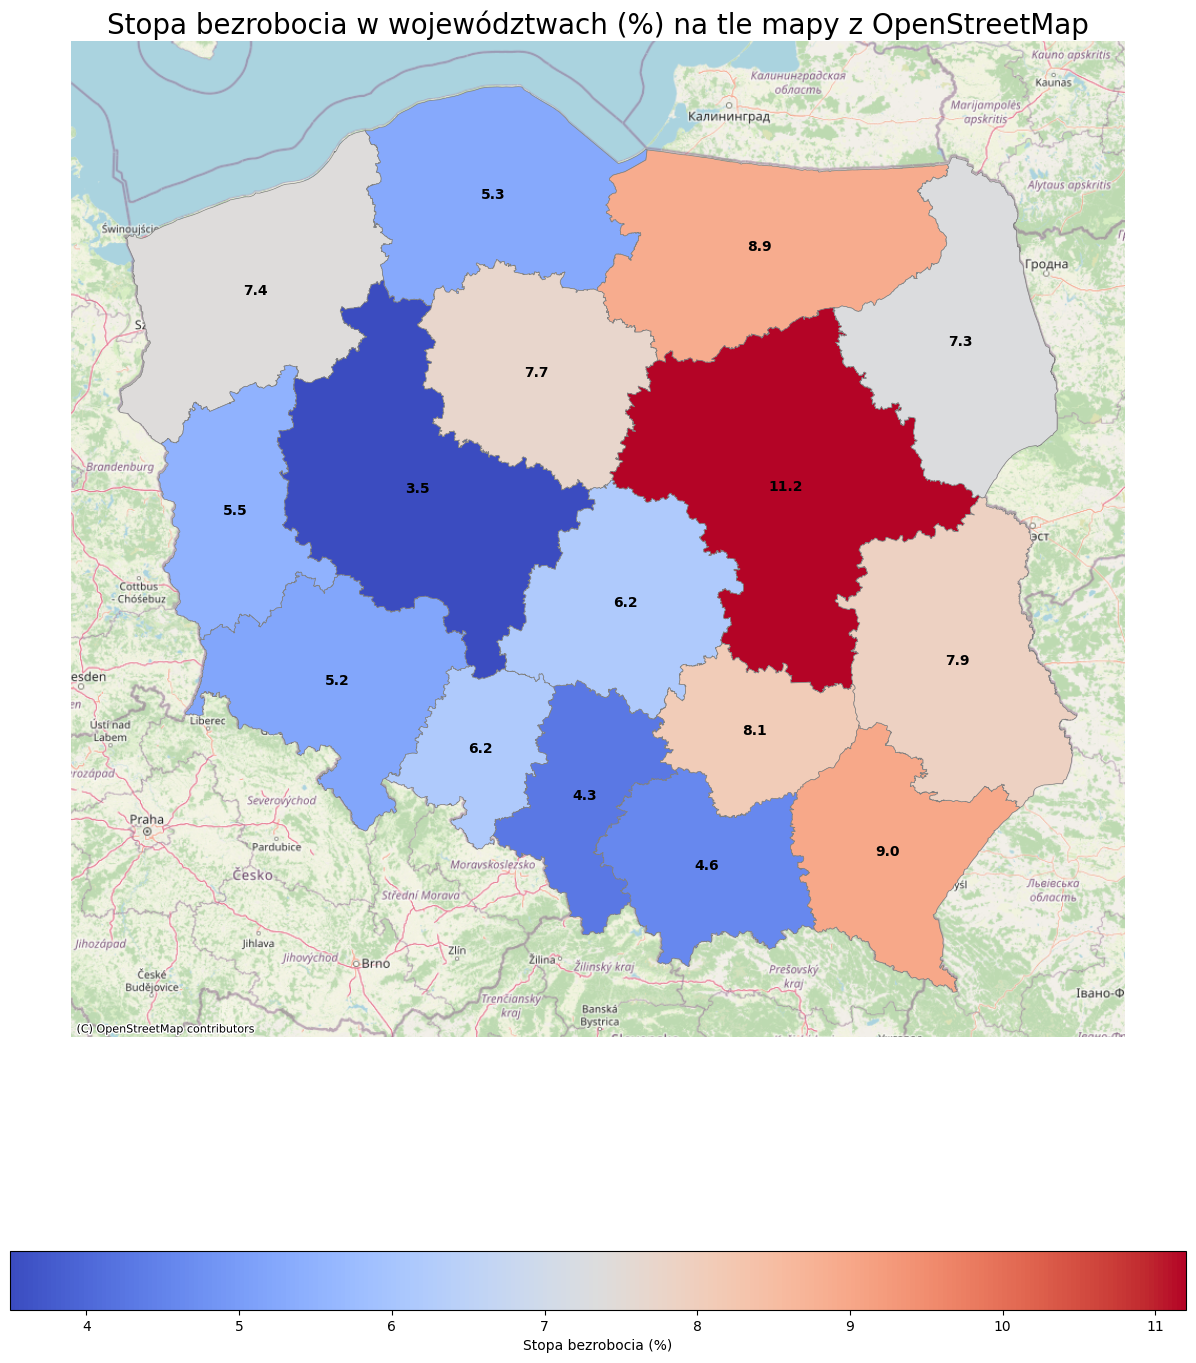

In [38]:
mb3857 = mapa_bezrobocia.to_crs(epsg=3857)
fig, ax = plt.subplots(1, 1, figsize=(15, 15))

mb3857.plot(
    column='Stopa bezrobocia w %',
    ax=ax,
    legend=True,
    legend_kwds={'label': "Stopa bezrobocia (%)", 'orientation': "horizontal", 'shrink': 0.8},
    cmap='coolwarm',
    edgecolor='gray',
    linewidth=0.5
 )

ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, crs=mb3857.crs.to_string())

for idx, row in mb3857.iterrows():
    wartosc = row['Stopa bezrobocia w %']
    if pd.notna(wartosc):
        x = row['geometry'].centroid.x
        y = row['geometry'].centroid.y
        ax.annotate(
            text=f"{wartosc:.1f}",
            xy=(x, y),
            ha='center',
            va='center',
            fontsize=10,
            color='black',
            weight='bold'
        )

ax.set_axis_off()
plt.title('Stopa bezrobocia w województwach (%) na tle mapy z OpenStreetMap', fontsize=20)
plt.tight_layout()
plt.show()

## ZALESIENIE

In [23]:
dane_lasy = pd.read_csv('data/lasy.csv', encoding='utf-8', sep=';')
dane_lasy

,Kod,Nazwa,lasy ogółem;2024;[ha],Unnamed: 3
0,200000,DOLNOŚLĄSKIE,"598542,00",NaN
1,400000,KUJAWSKO-POMORSKIE,"422039,88",NaN
2,600000,LUBELSKIE,"589452,06",NaN
3,800000,LUBUSKIE,"692156,48",NaN
4,1000000,ŁÓDZKIE,"390691,83",NaN
5,1200000,MAŁOPOLSKIE,"434367,76",NaN
6,1400000,MAZOWIECKIE,"831888,41",NaN
7,1600000,OPOLSKIE,"251588,33",NaN
8,1800000,PODKARPACKIE,"685594,97",NaN
9,2000000,PODLASKIE,"631647,13",NaN


In [24]:
dane_lasy = dane_lasy.rename(columns={
    'Nazwa' : 'Wojewodztwo',
    'lasy ogółem;2024;[ha]' : 'Lasy ogółem [ha]'})
dane_lasy = dane_lasy[['Wojewodztwo', 'Lasy ogółem [ha]']]
dane_lasy

,Wojewodztwo,Lasy ogółem [ha]
0,DOLNOŚLĄSKIE,"598542,00"
1,KUJAWSKO-POMORSKIE,"422039,88"
2,LUBELSKIE,"589452,06"
3,LUBUSKIE,"692156,48"
4,ŁÓDZKIE,"390691,83"
5,MAŁOPOLSKIE,"434367,76"
6,MAZOWIECKIE,"831888,41"
7,OPOLSKIE,"251588,33"
8,PODKARPACKIE,"685594,97"
9,PODLASKIE,"631647,13"


In [25]:
dane_lasy['Lasy ogółem [ha]'] = dane_lasy['Lasy ogółem [ha]'].astype(str).str.replace(',', '.').pipe(pd.to_numeric, errors='coerce')
dane_lasy['Wojewodztwo'] = dane_lasy['Wojewodztwo'].str.title()
dane_lasy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Wojewodztwo       16 non-null     object 
 1   Lasy ogółem [ha]  16 non-null     float64
dtypes: float64(1), object(1)
memory usage: 384.0+ bytes


In [26]:
# Przeliczanie na jednostki 100 000 ha i zaokrąglanie do 1 miejsca po przecinku
dane_lasy['Lasy [100 tys. ha]'] = (dane_lasy['Lasy ogółem [ha]'] / 100000).round(1)
dane_lasy

,Wojewodztwo,Lasy ogółem [ha],Lasy [100 tys. ha]
0,Dolnośląskie,598542.00,6.0
1,Kujawsko-Pomorskie,422039.88,4.2
2,Lubelskie,589452.06,5.9
3,Lubuskie,692156.48,6.9
4,Łódzkie,390691.83,3.9
5,Małopolskie,434367.76,4.3
6,Mazowieckie,831888.41,8.3
7,Opolskie,251588.33,2.5
8,Podkarpackie,685594.97,6.9
9,Podlaskie,631647.13,6.3


In [27]:
dane_lasy

,Wojewodztwo,Lasy ogółem [ha],Lasy [100 tys. ha]
0,Dolnośląskie,598542.00,6.0
1,Kujawsko-Pomorskie,422039.88,4.2
2,Lubelskie,589452.06,5.9
3,Lubuskie,692156.48,6.9
4,Łódzkie,390691.83,3.9
5,Małopolskie,434367.76,4.3
6,Mazowieckie,831888.41,8.3
7,Opolskie,251588.33,2.5
8,Podkarpackie,685594.97,6.9
9,Podlaskie,631647.13,6.3


In [28]:
mapa_lasy = mapa.merge(dane_lasy, on='Wojewodztwo', how='left')
mapa_lasy

,Wojewodztwo,Kod_TERYT,geometry,Lasy ogółem [ha],Lasy [100 tys. ha]
0,Zachodniopomorskie,32,"POLYGON ((188256.168 683730.875, 189761.898 68...",823175.31,8.2
1,Lubuskie,08,"POLYGON ((249058.528 411232.826, 249030.522 41...",692156.48,6.9
2,Dolnośląskie,02,"POLYGON ((351910.997 289041.305, 351818.002 28...",598542.00,6.0
3,Wielkopolskie,30,"POLYGON ((441690.785 515930.957, 441724.727 51...",770519.54,7.7
4,Pomorskie,22,"POLYGON ((488665.467 751328.589, 488780.891 75...",669074.14,6.7
5,Opolskie,16,"POLYGON ((410362.99 269639.399, 410366.16 2697...",251588.33,2.5
6,Kujawsko-Pomorskie,04,"POLYGON ((441690.785 515930.957, 441653.937 51...",422039.88,4.2
7,Śląskie,24,"MULTIPOLYGON (((559302.978 302887.587, 559268....",395940.78,4.0
8,Łódzkie,10,"POLYGON ((598629.334 417093.448, 598631.826 41...",390691.83,3.9
9,Małopolskie,12,"POLYGON ((631316.899 166704.316, 631331.032 16...",434367.76,4.3


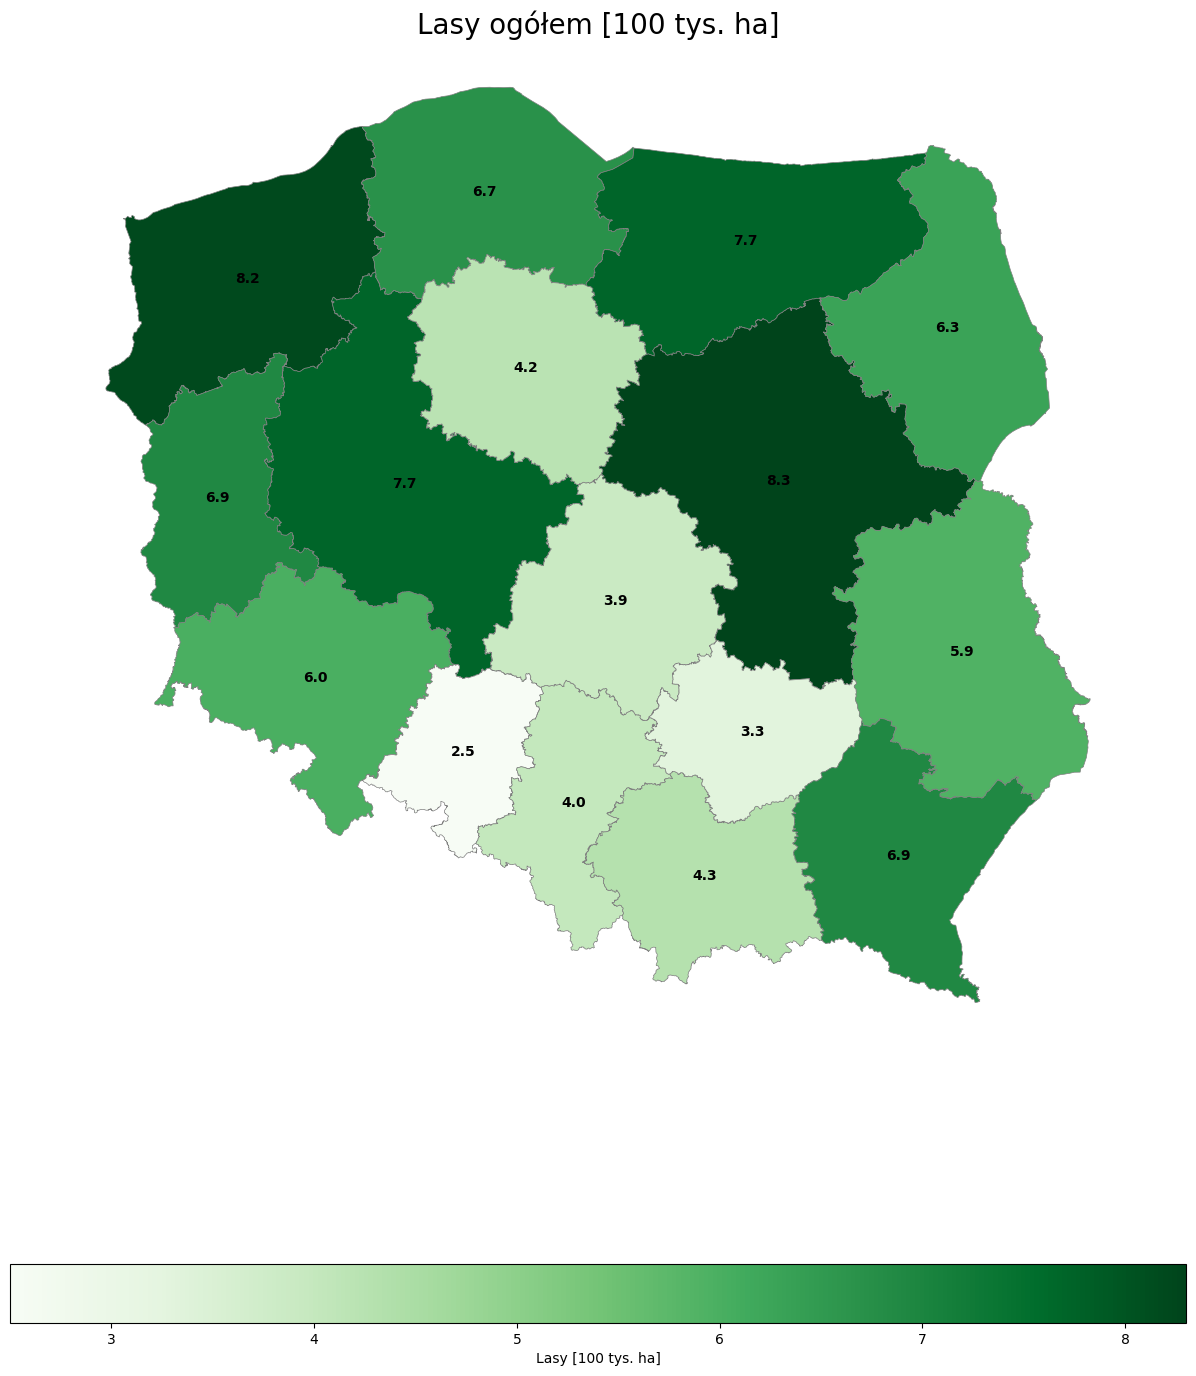

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
mapa_lasy.plot(
    column='Lasy [100 tys. ha]',
    ax=ax,
    legend=True,
    legend_kwds={'label': "Lasy [100 tys. ha]", 'orientation': "horizontal", 'shrink': 0.8},
    cmap='Greens',
    edgecolor='gray',
    linewidth=0.5
)

for idx, row in mapa_lasy.iterrows():
    wartosc = row['Lasy [100 tys. ha]']
    if pd.notna(wartosc):
        x = row['geometry'].centroid.x
        y = row['geometry'].centroid.y
        ax.annotate(
            text=f"{wartosc:.1f}",
            xy=(x, y),
            ha='center',
            va='center',
            fontsize=10,
            color='black',
            weight='bold'
)
ax.set_axis_off()
plt.title('Lasy ogółem [100 tys. ha]', fontsize=20)
plt.tight_layout()
plt.show()

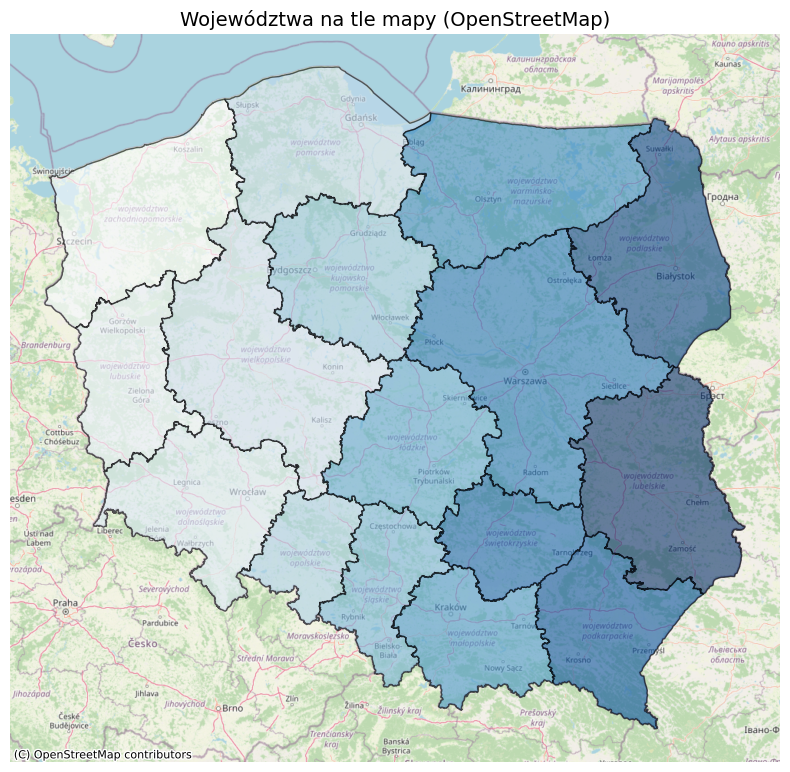

In [30]:
# Kontekstowy wykres z mapą Polski jako tło (contextily)
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

# Wczytaj warstwy (dostosuj ścieżki jeśli inne)
woj = gpd.read_file('data/wojewodztwa.shp')

# Ustaw CRS jeśli brak (często PUWG 1992: EPSG:2180 dla Polski)
if woj.crs is None:
    woj = woj.set_crs(epsg=2180, allow_override=True)
# Reprojekcja do Web Mercator (EPSG:3857) wymagana dla contextily
woj3857 = woj.to_crs(epsg=3857)
fig, ax = plt.subplots(figsize=(8, 10))
# Wizualizacja tematyczna; zmień kolumnę na swoją metrykę
# przykład: column='stopa_bezrobocia'
woj3857.plot(ax=ax, column=None, edgecolor='black', alpha=0.6, cmap='Blues')

# Dodanie podkładu mapowego - OpenStreetMap (bez klucza)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, crs=woj3857.crs.to_string())

# Estetyka
ax.set_axis_off()
ax.set_title('Województwa na tle mapy (OpenStreetMap)', fontsize=14)
plt.tight_layout()
plt.show()